In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
"""))

<font size=6>iris 다중분류</font>

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split #셋 분리
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
# import tensorflow.keras.utils as utils
# from tensorflow.keras import metrics
# from tensorflow.keras.callbacks import EarlyStopping

In [10]:
#1. 데이터 셋
iris = sns.load_dataset("iris")
iris.info()
iris_X = iris.iloc[:,:-1].to_numpy()
iris_Y = iris.iloc[:,-1]
iris_Y = pd.get_dummies(iris_Y).to_numpy()#라벨링 (숫자 아니라 utils 불가)
train_X, test_X, train_Y, test_Y = train_test_split(iris_X, iris_Y, test_size=0.3, random_state = 1)
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


((105, 4), (45, 4), (105, 3), (45, 3))

In [13]:
#2. 모델 구성
model = Sequential()
model.add(Dense(60, input_dim=4, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(3, activation="softmax"))
#3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
#4. 학습시키기
hist = model.fit(train_X, train_Y, batch_size=50, epochs=100, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 195ms/step - loss: 1.2572 - accuracy: 0.3594 - val_loss: 1.2703 - val_accuracy: 0.2381
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 1.1659 - accuracy: 0.3594 - val_loss: 1.2041 - val_accuracy: 0.2381
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 1.0982 - accuracy: 0.4892 - val_loss: 1.1679 - val_accuracy: 0.3810
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 1.0563 - accuracy: 0.4016 - val_loss: 1.1386 - val_accuracy: 0.4286
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 1.0144 - accuracy: 0.5384 - val_loss: 1.1208 - val_accuracy: 0.5238
Epoch 6/100
2/2 [==============================] - 0s 36ms/step - loss: 0.9985 - accuracy: 0.6670 - val_loss: 1.0969 - val_accuracy: 0.5238
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 0.9678 - accuracy: 0.7308 - val_loss: 1.0736 - val_accuracy: 0.5238
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 39ms/step - loss: 0.1341 - accuracy: 0.9775 - val_loss: 0.2167 - val_accuracy: 0.9048
Epoch 60/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1200 - accuracy: 0.9841 - val_loss: 0.2175 - val_accuracy: 0.9048
Epoch 61/100
2/2 [==============================] - 0s 36ms/step - loss: 0.1292 - accuracy: 0.9775 - val_loss: 0.2020 - val_accuracy: 0.9524
Epoch 62/100
2/2 [==============================] - 0s 39ms/step - loss: 0.1328 - accuracy: 0.9708 - val_loss: 0.1938 - val_accuracy: 0.9524
Epoch 63/100
2/2 [==============================] - 0s 39ms/step - loss: 0.1215 - accuracy: 0.9775 - val_loss: 0.1908 - val_accuracy: 0.9524
Epoch 64/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1316 - accuracy: 0.9708 - val_loss: 0.1896 - val_accuracy: 0.9524
Epoch 65/100
2/2 [==============================] - 0s 43ms/step - loss: 0.1174 - accuracy: 0.9775 - val_loss: 0.1903 - val_accuracy: 0.9524
Epoch 66/100
2/2 [========

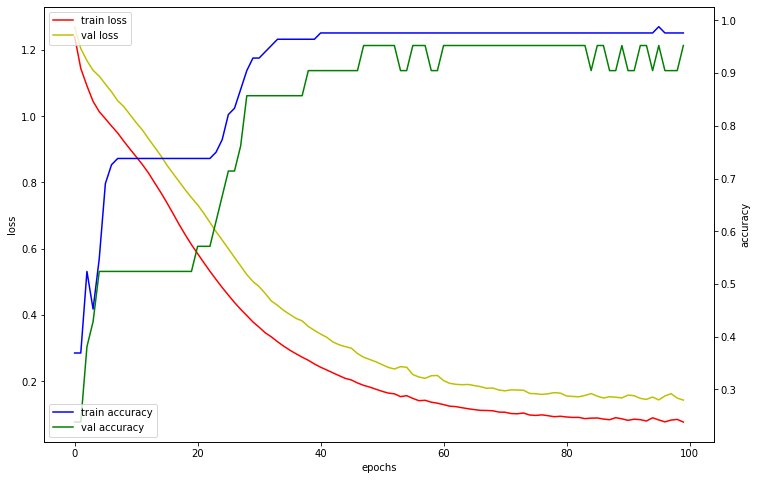

In [14]:
#5. 모델 학습과정을 표시하고 평가
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'r', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'y', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc=2)
acc_ax.legend(loc=3)

In [34]:
#6. 예측
np.argmax(test_Y, axis=1) == model.predict_classes(test_X)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [35]:
#7. 평가
score = model.evaluate(test_X, test_Y, batch_size=10)

5/5 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 1.0000
